In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 

In [2]:
import os 
os.chdir("D:\\Technocolabs Machine Learning Internship\\Minor Project\\Dataset")

x = pd.read_csv("top5feat.csv")
x.head()

,spread1,MDVP:APQ,PPE,MDVP:Shimmer,MDVP:Shimmer(dB)
0,0.569875,0.480463,0.750510,0.603244,0.590614
1,0.703277,0.610978,0.855157,0.737209,0.731658
2,0.636745,0.544553,0.813535,0.674276,0.635870
3,0.695627,0.561300,0.855487,0.693413,0.661557
4,0.762472,0.618416,0.898475,0.755571,0.706210


In [3]:
df = pd.read_csv("parkinsons.data")
y = df["status"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

### Splitting Data 

In [4]:
train_x,test_x,train_y,test_y = tts(x,y,test_size=0.2,random_state=96,stratify=y)
train_x.shape,train_y.shape

((156, 5), (156,))

In [5]:
test_x.shape,test_y.shape

((39, 5), (39,))

### Model Building 

### XGB

In [41]:
model = xgb.XGBClassifier(colsample_bytree=0.8,
                          gamma=0,
                          learning_rate=0.5,
                          max_depth=4,
                          min_child_weight=8,
                          n_estimators=100,
                          alpha=10,
                          reg_lambda=0.01,
                          subsample=0.8,
                          seed=40)

model.fit(train_x, train_y)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=4,
              min_child_weight=8, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=40,
              reg_alpha=10, reg_lambda=0.01, scale_pos_weight=1, seed=40,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [42]:
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

train_score = accuracy_score(train_predict, train_y)
test_score = accuracy_score(test_predict, test_y)
print("Training Score : ", train_score)
print("Testing Score : ", test_score)

Training Score :  0.8589743589743589
Testing Score :  0.8461538461538461


#### Logistic Regression Model

In [6]:
lr = LogisticRegression()
lr.fit(train_x,train_y)

LogisticRegression()

In [7]:
lr_train_predict = lr.predict(train_x)
lr_test_predict = lr.predict(test_x)

lr_train_score = accuracy_score(lr_train_predict, train_y)
lr_test_score = accuracy_score(lr_test_predict, test_y)
print("Training Score : ", lr_train_score)
print("Testing Score : ", lr_test_score)

Training Score :  0.8141025641025641
Testing Score :  0.8461538461538461


In [8]:
# K-Fold Cross Validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

lr_crossmodel = cross_val_score(lr,x,y,cv=cv)
lr_crossmodel

array([0.87179487, 0.82051282, 0.74358974, 0.69230769, 0.82051282])

#### KNN Classifier

In [9]:
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [10]:
knn_train_predict = knn.predict(train_x)
knn_test_predict = knn.predict(test_x)

knn_train_score = accuracy_score(knn_train_predict, train_y)
knn_test_score = accuracy_score(knn_test_predict, test_y)
print("Training Score : ", knn_train_score)
print("Testing Score : ", knn_test_score)

Training Score :  0.9230769230769231
Testing Score :  0.8461538461538461


* Optimizing using Elbow Method

In [11]:
def Elbow(K):
    e=[]
    for i in K:
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_x,train_y)
        tmp=knn.predict(test_x)
        tmp=f1_score(tmp,test_y)
        error=1-tmp
        e.append(error)
    return e

In [12]:
k=range(1,30)

In [13]:
test=Elbow(k)

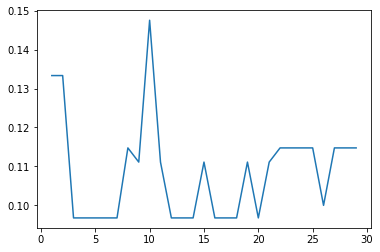

In [14]:
plt.plot(k,test)

In [15]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=4)

In [16]:
knn_train_predict = knn.predict(train_x)
knn_test_predict = knn.predict(test_x)

knn_train_score = accuracy_score(knn_train_predict, train_y)
knn_test_score = accuracy_score(knn_test_predict, test_y)
print("Training Score : ", knn_train_score)
print("Testing Score : ", knn_test_score)

Training Score :  0.9358974358974359
Testing Score :  0.8461538461538461


#### DecisionTree Classifier

In [17]:
cl=DecisionTreeClassifier()
cl.fit(train_x,train_y)

DecisionTreeClassifier()

In [18]:
print(cl.score(test_x,test_y))

0.8205128205128205


* Improving Model

In [19]:
train_acc=[]
test_acc=[]
for i in range(1,10):
    dt_model=DecisionTreeClassifier(max_depth=i,random_state=10)
    dt_model.fit(train_x,train_y)
    train_acc.append(dt_model.score(train_x,train_y))
    test_acc.append(dt_model.score(test_x,test_y))

In [20]:
frame=pd.DataFrame({
    'max_depth':range(1,10),
    'train_acc':train_acc,
    'test_acc':test_acc,
})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.865385,0.871795
1,2,0.865385,0.871795
2,3,0.923077,0.846154
3,4,0.935897,0.794872
4,5,0.974359,0.820513


No handles with labels found to put in legend.


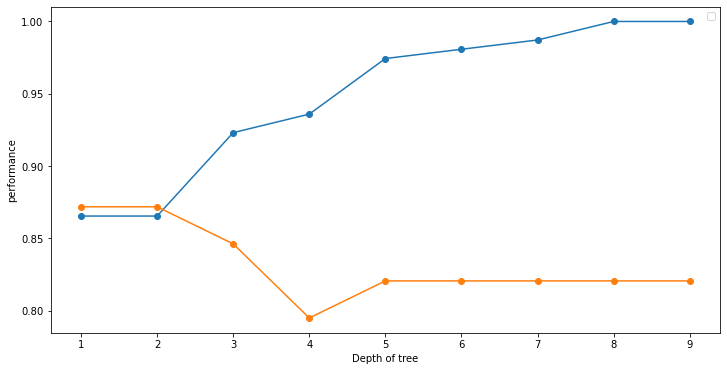

In [21]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

* Depth should be 2

In [22]:
cl=DecisionTreeClassifier(max_depth=2)
cl.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=2)

In [23]:
cl_train_predict = cl.predict(train_x)
cl_test_predict = cl.predict(test_x)

cl_train_score = accuracy_score(cl_train_predict, train_y)
cl_test_score = accuracy_score(cl_test_predict, test_y)
print("Training Score : ", cl_train_score)
print("Testing Score : ", cl_test_score)

Training Score :  0.8653846153846154
Testing Score :  0.8717948717948718


This model seems more reliable with higher accuracy

#### Random Forest Classifier

In [24]:
ran = RandomForestClassifier()
ran.fit(train_x,train_y)

RandomForestClassifier()

In [26]:
ran_train_predict = ran.predict(train_x)
ran_test_predict = ran.predict(test_x)

ran_train_score = accuracy_score(ran_train_predict, train_y)
ran_test_score = accuracy_score(ran_test_predict, test_y)
print("Training Score : ", ran_train_score)
print("Testing Score : ", ran_test_score)

Training Score :  1.0
Testing Score :  0.8461538461538461


In [27]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(train_x,train_y)

MultinomialNB()

In [28]:
mn_train_predict = mn.predict(train_x)
mn_test_predict = mn.predict(test_x)

mn_train_score = accuracy_score(mn_train_predict, train_y)
mn_test_score = accuracy_score(mn_test_predict, test_y)
print("Training Score : ", mn_train_score)
print("Testing Score : ", mn_test_score)

Training Score :  0.7564102564102564
Testing Score :  0.7435897435897436


### Voting Classifier 

In [45]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[
    ('lr',lr),('knn',knn),('des',cl),('rf',ran),('mnb',mn)
],voting='hard')

eclf.fit(train_x,train_y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=4)),
                             ('des', DecisionTreeClassifier(max_depth=2)),
                             ('rf', RandomForestClassifier()),
                             ('mnb', MultinomialNB())])

In [46]:
v_train_predict = eclf.predict(train_x)
v_test_predict = eclf.predict(test_x)

v_train_score = accuracy_score(v_train_predict, train_y)
v_test_score = accuracy_score(v_test_predict, test_y)
print("Training Score : ", v_train_score)
print("Testing Score : ", v_test_score)

Training Score :  0.9230769230769231
Testing Score :  0.8717948717948718


In [54]:
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
confusion_matrix(v_test_predict,test_y)

array([[ 5,  0],
       [ 5, 29]], dtype=int64)

In [55]:
print(classification_report(v_test_predict,test_y))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.85      0.92        34

    accuracy                           0.87        39
   macro avg       0.75      0.93      0.79        39
weighted avg       0.94      0.87      0.89        39



* Voting Classifier performs best

### Selecting Voting Classifier as Model to be deployed

In [59]:
x.columns

Index(['spread1', 'MDVP:APQ', 'PPE', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)'], dtype='object')

In [67]:
train_x.head()

,spread1,MDVP:APQ,PPE,MDVP:Shimmer,MDVP:Shimmer(dB)
177,0.267253,0.181820,0.441729,0.171007,0.161286
63,0.130061,0.167479,0.300202,0.215594,0.195706
135,0.475753,0.517667,0.661282,0.580313,0.547776
128,0.194354,0.040775,0.376183,0.031517,0.052149
112,0.558430,0.304500,0.726335,0.361823,0.331423


In [64]:
def predict(spread1,MDVP_APQ,PPE,MDVP_Shimmer,MDVP_ShimmerDB):
    x1 = np.zeros(len(x.columns))
    x1[0]=spread1
    x1[1]=MDVP_APQ
    x1[2]=PPE
    x1[3]=MDVP_Shimmer
    x1[4]=MDVP_ShimmerDB

    return eclf.predict([x1])[0]

In [68]:
predict(0.130061,0.167479,0.300202,0.215594,0.195706)

0

In [69]:
train_y.head()

177    1
63     0
135    1
128    1
112    1
Name: status, dtype: int64

We choosed the second row as parameter and we got exact prediction

In [76]:
test_x.head()

,spread1,MDVP:APQ,PPE,MDVP:Shimmer,MDVP:Shimmer(dB)
24,0.435284,0.248346,0.638767,0.219192,0.240826
106,0.177869,0.086412,0.353874,0.043231,0.048391
132,0.457218,0.081634,0.668117,0.091212,0.080904
62,0.180559,0.173458,0.340087,0.215353,0.195706
125,0.428626,0.336828,0.651229,0.359149,0.369507


In [77]:
predict(0.177869,0.086412,0.353874,0.043231,0.048391)

1

In [78]:
test_y.head()

24     1
106    1
132    1
62     0
125    1
Name: status, dtype: int64

Hence we got accuracte result for test set also.

### Saving Model using pickle 

In [79]:
import pickle
with open("parkinsons_model.pickle","wb") as f:
    pickle.dump(eclf,f)
    

In [80]:
col = x.columns

In [81]:
import json
columns = {
    "data_columns":[col.lower() for col in col]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))